## Gradient Boost Model ##

We will be exploring the gradient boost model since it has great predictive power, handles heterogenous features.outliers in the data very well.

In [100]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score
from sklearn import metrics
import pickle

In [2]:
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv('./fetal_health.csv')

In [4]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1


In [10]:
#find baseline

df['fetal_health'].value_counts(normalize=True)

1    0.778457
2    0.138758
3    0.082785
Name: fetal_health, dtype: float64

In [45]:
X = df.drop(columns=['fetal_health'])

y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y )

In [46]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [55]:
#instantiate model
gbc = GradientBoostingClassifier()

#fit to scaled data
gbc.fit(X_train_sc, y_train)

#make predictions
predictions = gbc.predict(X_test_sc)

#print results
print(f'training score: {gbc.score(X_train_sc, y_train)}')
print(f'testing score: {gbc.score(X_test_sc, y_test)}')


training score: 0.9937264742785445
testing score: 0.9492481203007519


In [ ]:
#try grid search to hypertune params

In [56]:
X = df.drop(columns=['fetal_health'])

y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y )

In [57]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('gbc' , GradientBoostingClassifier())
])

In [58]:
pipe.get_params()

{'memory': None,
 'steps': [('ss', StandardScaler()), ('gbc', GradientBoostingClassifier())],
 'verbose': False,
 'ss': StandardScaler(),
 'gbc': GradientBoostingClassifier(),
 'ss__copy': True,
 'ss__with_mean': True,
 'ss__with_std': True,
 'gbc__ccp_alpha': 0.0,
 'gbc__criterion': 'friedman_mse',
 'gbc__init': None,
 'gbc__learning_rate': 0.1,
 'gbc__loss': 'deviance',
 'gbc__max_depth': 3,
 'gbc__max_features': None,
 'gbc__max_leaf_nodes': None,
 'gbc__min_impurity_decrease': 0.0,
 'gbc__min_impurity_split': None,
 'gbc__min_samples_leaf': 1,
 'gbc__min_samples_split': 2,
 'gbc__min_weight_fraction_leaf': 0.0,
 'gbc__n_estimators': 100,
 'gbc__n_iter_no_change': None,
 'gbc__random_state': None,
 'gbc__subsample': 1.0,
 'gbc__tol': 0.0001,
 'gbc__validation_fraction': 0.1,
 'gbc__verbose': 0,
 'gbc__warm_start': False}

In [59]:
pipe_params = {
    'gbc__max_depth':[1, 2, 3, 4],
    'gbc__learning_rate'  :[0.1, 0.001, 1],
    'gbc__n_estimators' :[100, 300, 500],
    'gbc__min_samples_leaf' :[1, 2]
}

In [60]:
gs = GridSearchCV(pipe, param_grid = pipe_params, cv = 5)

In [61]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('gbc', GradientBoostingClassifier())]),
             param_grid={'gbc__learning_rate': [0.1, 0.001, 1],
                         'gbc__max_depth': [1, 2, 3, 4],
                         'gbc__min_samples_leaf': [1, 2],
                         'gbc__n_estimators': [100, 300, 500]})

In [62]:
print(f'training score:  {gs.score(X_train, y_train)}')

print(f'testing score: {gs.score(X_test, y_test)}')

training score:  1.0
testing score: 0.9642857142857143


In [63]:
gs.best_params_

{'gbc__learning_rate': 0.1,
 'gbc__max_depth': 2,
 'gbc__min_samples_leaf': 2,
 'gbc__n_estimators': 500}

In [65]:
preds = gs.predict(X_test)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))


              precision    recall  f1-score   support

           1       0.98      0.98      0.98       414
           2       0.91      0.85      0.88        74
           3       0.93      0.98      0.96        44

    accuracy                           0.96       532
   macro avg       0.94      0.94      0.94       532
weighted avg       0.96      0.96      0.96       532

[[407   5   2]
 [ 10  63   1]
 [  0   1  43]]


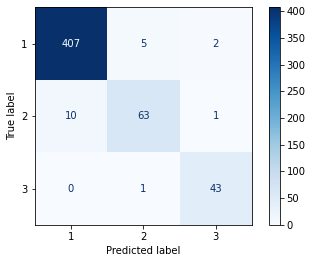

In [85]:
cm = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(cm, display_labels=gs.classes_).plot(cmap='Blues');

In [ ]:
# try with less features

In [86]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1


In [90]:
X = df.loc[:, 'baseline value': 'mean_value_of_long_term_variability']

y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y )

In [91]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)

X_test_sc = ss.transform(X_test)

In [95]:
#instantiate model
gbc = GradientBoostingClassifier(learning_rate=.1, max_depth=2, min_samples_leaf=2, n_estimators=500)

#fit to scaled data
gbc.fit(X_train_sc, y_train)

#make predictions
predictions = gbc.predict(X_test_sc)

#print results
print(f'training score: {gbc.score(X_train_sc, y_train)}')
print(f'testing score: {gbc.score(X_test_sc, y_test)}')

training score: 0.9887076537013801
testing score: 0.9473684210526315


In [96]:
preds = gbc.predict(X_test_sc)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test, preds))


              precision    recall  f1-score   support

           1       0.96      0.97      0.97       414
           2       0.91      0.78      0.84        74
           3       0.86      0.98      0.91        44

    accuracy                           0.95       532
   macro avg       0.91      0.91      0.91       532
weighted avg       0.95      0.95      0.95       532

[[403   5   6]
 [ 15  58   1]
 [  0   1  43]]


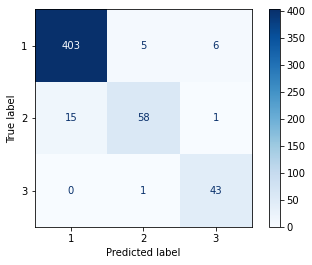

In [97]:
cm = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(cm, display_labels=gs.classes_).plot(cmap='Blues');

In [98]:
X.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability'],
      dtype='object')

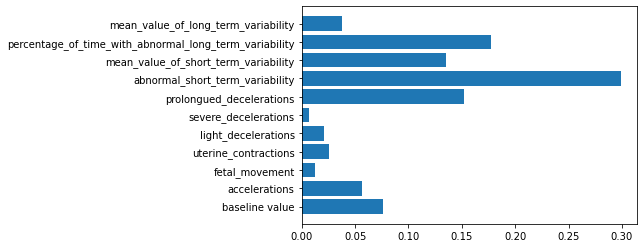

In [99]:
features = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']
plt.barh(features, gbc.feature_importances_);


In [101]:
# pickle

with open('./gbc.pkl', 'wb') as pickle_out:
    pickle_out = pickle.dump(gbc, pickle_out)

In [103]:
with open('./gbc.pkl', 'rb') as pickle_in:
    list_from_pickle = pickle.load(pickle_in)
    
list_from_pickle

GradientBoostingClassifier(max_depth=2, min_samples_leaf=2, n_estimators=500)